# Data Wrangling Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
games_df=pd.read_csv('college_football_data_raw.csv',encoding='utf-8')
display(games_df.head())

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance
0,2005,Tulane,Conference USA,2,9,False,2894.090909
1,2005,Idaho State,Big Sky,5,6,False,59519.000000
2,2005,Howard,MEAC,3,6,False,NaN
3,2005,Stony Brook,NEC,6,5,False,NaN
4,2005,Kansas State,Big 12,5,6,False,0.000000


In [4]:
#Load in csv file with revenue and expense data
rev_exp_df=pd.read_csv('Revenues_Expenses_Data.csv',encoding='utf-8')
rev_exp_df.rename(columns={'team':'Team','year':'Year'},inplace=True)
display(rev_exp_df.head())

,Team,Year,total_revenue,total_expense
0,Air Force,2005,15481081.0,14330645.0
1,Air Force,2006,27085224.0,26606845.0
2,Air Force,2007,29024404.0,28064038.0
3,Air Force,2008,30604249.0,31174646.0
4,Air Force,2009,33616930.0,34945674.0


In [5]:
#Horizontally join the two dfs based on team column
outer_join=pd.merge(games_df,rev_exp_df,on=['Team','Year'],how='outer')
#Display to inspect that integration was successful
display(outer_join)
outer_join.to_csv("cfb_join_raw.csv", index=False)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
0,2007,Abilene Christian,FCS Independents,1.0,0.0,False,NaN,NaN,NaN
1,2013,Abilene Christian,FCS Independents,6.0,5.0,False,15628.0,NaN,NaN
2,2014,Abilene Christian,Southland,5.0,6.0,False,13730.0,NaN,NaN
3,2015,Abilene Christian,Southland,3.0,7.0,False,32547.0,NaN,NaN
4,2016,Abilene Christian,Southland,2.0,9.0,False,34128.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6189,2019,Youngstown State,MVFC,6.0,6.0,False,NaN,NaN,NaN
6190,2020,Youngstown State,MVFC,1.0,6.0,False,NaN,NaN,NaN
6191,2021,Youngstown State,MVFC,3.0,7.0,False,70103.0,NaN,NaN
6192,2022,Youngstown State,MVFC,7.0,4.0,False,59308.0,NaN,NaN


In [6]:
#Clean/Filter the data so that it only contains teams in our analysis
#make list for teams in our analysis
teams = [ "Air Force", "Akron", "Alabama", "App State", "Arizona", "Arizona State", 
         "Arkansas", "Arkansas State", "Army", "Auburn", "Ball State", "Boise State", 
         "Bowling Green", "Buffalo", "California", "Central Michigan", "Charlotte", 
         "Cincinnati", "Clemson", "Coastal Carolina", "Colorado", "Colorado State", 
         "East Carolina", "Eastern Michigan", "Florida", "Florida Atlantic", 
         "Florida International", "Florida State", "Fresno State", "Georgia", 
         "Georgia Southern", "Georgia State", "Georgia Tech", "Hawai'i", "Houston", 
         "Idaho", "Illinois", "Indiana", "Iowa", "Iowa State", "Kansas", "Kansas State", 
         "Kent State", "Kentucky", "Louisiana", "Louisiana Tech", "Louisville", "LSU", "Marshall", 
         "Maryland", "Massachusetts", "Memphis", "Miami (OH)", "Michigan", "Michigan State", 
         "Middle Tennessee", "Minnesota", "Mississippi State", "Missouri", "Navy", "NC State", 
         "Nebraska", "Nevada", "New Mexico", "New Mexico State", "North Carolina", "North Texas", 
         "Northern Illinois", "Ohio", "Ohio State", "Oklahoma", "Oklahoma State", "Old Dominion", 
         "Ole Miss", "Oregon", "Oregon State", "Penn State", "Pittsburgh", "Purdue", "Rutgers", 
         "San Diego State", "San José State", "South Alabama", "South Carolina", "South Florida", 
         "Southern Miss", "Temple", "Tennessee", "Texas", "Texas A&M", "Texas State", "Texas Tech", 
         "Toledo", "Troy", "UAB", "UCF", "UCLA", "UConn", "UL Monroe", "UNLV", "Utah", "Utah State", 
         "UTEP", "UTSA", "Virginia", "Virginia Tech", "Washington", "Washington State", "West Virginia",
         "Western Kentucky", "Western Michigan", "Wisconsin", "Wyoming" ] 

#Filter data frame so it only contains teams within teams list
df_filtered=outer_join[outer_join['Team'].isin(teams)]
#Inspect filtered dataframe to insure filter worked correctly
display(df_filtered)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
18,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
19,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
20,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
21,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
22,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
6152,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
6153,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
6154,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
6155,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [7]:
df_filtered.reset_index(drop=True, inplace=True)
display(df_filtered)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
0,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
1,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
2,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
3,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
4,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
2142,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
2143,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
2144,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
2145,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [8]:
df_filtered = df_filtered.copy()  # Create a deep copy
df_filtered.rename(columns={
    'Year': 'year',
    'Team': 'team',
    'Conference': 'conference',
    'Wins': 'wins',
    'Losses': 'losses',
    'Bowl Game': 'bowl_game',
    'Average Attendance': 'average_attendance'
}, inplace=True)
display(df_filtered)
df_filtered.to_csv("cfb_data_clean.csv", index=False)

,year,team,conference,wins,losses,bowl_game,average_attendance,total_revenue,total_expense
0,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
1,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
2,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
3,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
4,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
2142,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
2143,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
2144,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
2145,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [9]:
count_unique_teams = df_filtered['team'].nunique()
print(f"Count of unique teams: {count_unique_teams}")

Count of unique teams: 113


Correlation Coefficient: 0.2698184400362065
P-value: 3.9226676528763083e-35


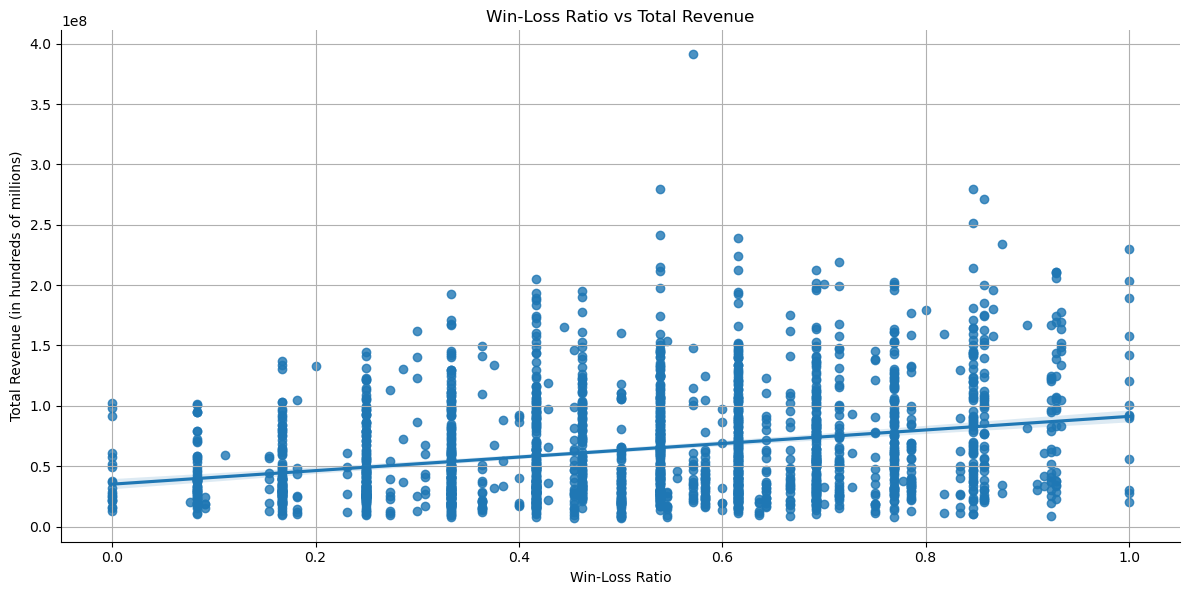

In [10]:
# Question 1: 
# Is there a correlation between a college football team's win-loss record and the total athletic revenue generated by its university?

# Calculate the win-loss ratio
df_filtered['win_loss_ratio'] = df_filtered['wins'] / (df_filtered['wins'] + df_filtered['losses'])

# Check for missing or invalid values
df_filtered = df_filtered.dropna(subset=['win_loss_ratio', 'total_revenue'])

# Calculate the correlation
correlation, p_value = pearsonr(df_filtered['win_loss_ratio'], df_filtered['total_revenue'])

# Print the correlation coefficient and p-value
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


# Optional: Linear regression line
sns.lmplot(data=df_filtered, x='win_loss_ratio', y='total_revenue', aspect=2, height=6)
plt.title("Win-Loss Ratio vs Total Revenue")
plt.xlabel("Win-Loss Ratio")
plt.ylabel("Total Revenue (in hundreds of millions)")
plt.grid(True)
plt.show()

Top 10 Teams by Net Profit:


,year,team,conference,wins,losses,bowl_game,average_attendance,total_revenue,total_expense,win_loss_ratio,net_profit,revenue_per_win
1421,2020,Oregon,Pac-12,4.0,3.0,True,0.166667,391769609.0,120884588.0,0.571429,270885021.0,9.794240e+07
1350,2006,Oklahoma State,Big 12,7.0,6.0,True,43342.833333,241364906.0,80300988.0,0.538462,161063918.0,3.448070e+07
1415,2014,Oregon,Pac-12,13.0,2.0,True,54578.923077,196030398.0,110378432.0,0.866667,85651966.0,1.507926e+07
1709,2023,Texas A&M,SEC,7.0,6.0,True,89303.333333,279188334.0,194692848.0,0.538462,84495486.0,3.988405e+07
1701,2015,Texas A&M,SEC,8.0,5.0,True,87830.000000,192608876.0,109313651.0,0.615385,83295225.0,2.407611e+07
1703,2017,Texas A&M,SEC,7.0,6.0,True,88382.000000,211960034.0,146546229.0,0.538462,65413805.0,3.028000e+07
1702,2016,Texas A&M,SEC,8.0,5.0,True,92234.750000,194388450.0,137101774.0,0.615385,57286676.0,2.429856e+07
1704,2018,Texas A&M,SEC,9.0,4.0,True,89667.750000,212399426.0,165782418.0,0.692308,46617008.0,2.359994e+07
567,2021,Georgia,SEC,14.0,1.0,True,81334.076923,169064656.0,124113714.0,0.933333,44950942.0,1.207605e+07
1411,2010,Oregon,Pac-10,12.0,1.0,True,0.000000,122394483.0,77856232.0,0.923077,44538251.0,1.019954e+07


Average Attendance by Year:


year
2005     4651.606952
2006    46555.992849
2007    45559.532868
2008    48188.789893
2009        0.000000
2010        0.000000
2011        0.000000
2012    45320.890846
2013    46735.395339
2014    43337.732272
2015    43848.951953
2016    44076.552755
2017    42751.969654
2018    42432.289681
2019    42379.212302
2020     5342.068081
2021    40862.813664
2022    43003.046509
2023    43845.167102
Name: average_attendance, dtype: float64

Enhanced data saved to enhanced_project_data.csv.


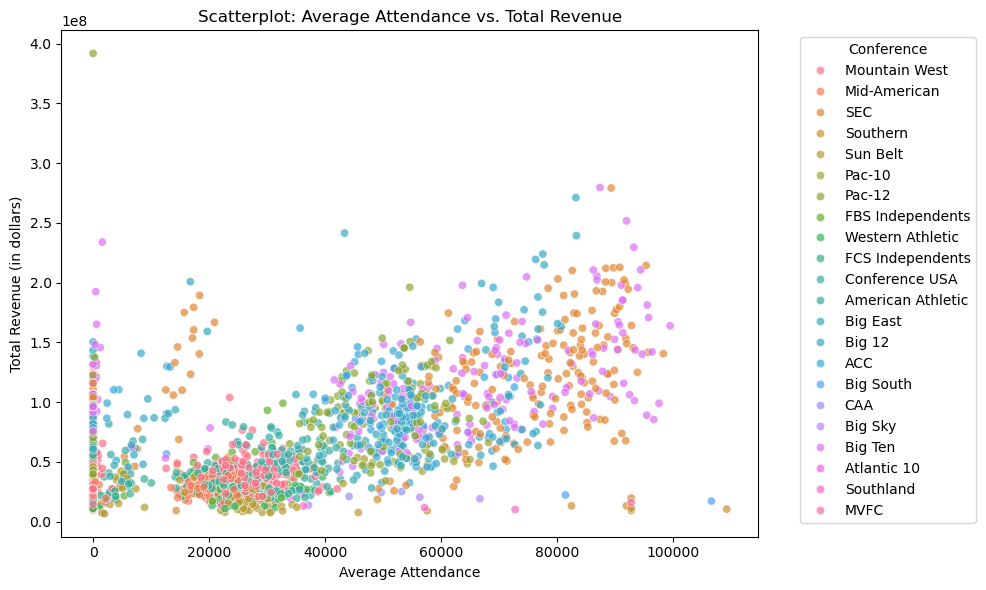

In [11]:
# Add a new column for net profit/loss
df_filtered['net_profit'] = df_filtered['total_revenue'] - df_filtered['total_expense']

# Calculate revenue-to-win ratio (avoid dividing by zero)
df_filtered['revenue_per_win'] = df_filtered['total_revenue'] / df_filtered['wins'].replace(0, float('nan'))

# Filter for teams with positive net profit
positive_profit_teams = df_filtered[df_filtered['net_profit'] > 0]

# Sort by net profit in descending order to see top-performing teams
top_profit_teams = positive_profit_teams.sort_values(by='net_profit', ascending=False)

# Group by year and calculate average attendance for all teams
average_attendance_by_year = df_filtered.groupby('year')['average_attendance'].mean()

# Display the results
print("Top 10 Teams by Net Profit:")
display(top_profit_teams.head(10))

print("Average Attendance by Year:")
display(average_attendance_by_year)

# Save the enhanced data to a new CSV file
df_filtered.to_csv('enhanced_project_data.csv', index=False)
print("Enhanced data saved to enhanced_project_data.csv.")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#  Scatterplot: Average Attendance vs. Total Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='average_attendance', y='total_revenue', hue='conference', alpha=0.7)
plt.title('Scatterplot: Average Attendance vs. Total Revenue')
plt.xlabel('Average Attendance')
plt.ylabel('Total Revenue (in dollars)')
plt.legend(title='Conference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/7g/q0h2bpg11r99tr22gtgc_fh40000gn/T/ipykernel_26837/4023711294.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams_revenue_attendance, x='total_revenue', y='team', palette='coolwarm', label="Total Revenue")


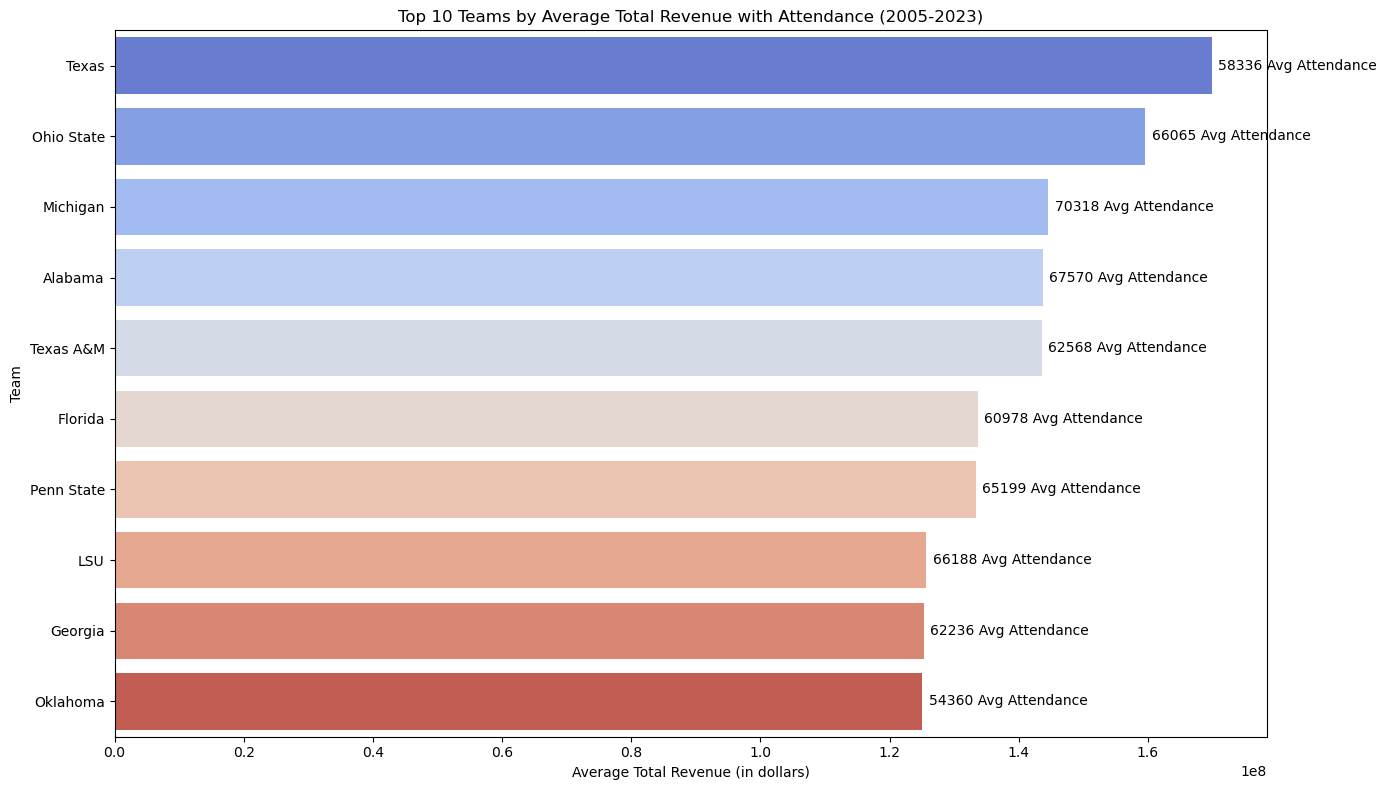

In [12]:
# Top 10 Teams by Total Revenue with Attendance
top_teams_revenue_attendance = (
    df_filtered.groupby(['team'])[['total_revenue', 'average_attendance']]
    .mean()
    .sort_values(by='total_revenue', ascending=False)
    .head(10)
    .reset_index()
)

# Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(data=top_teams_revenue_attendance, x='total_revenue', y='team', palette='coolwarm', label="Total Revenue")

# Adding average attendance as a text label
for i, row in top_teams_revenue_attendance.iterrows():
    plt.text(
        row['total_revenue'] + 1e6, i,  # Offset slightly to the right of the bar
        f"{int(row['average_attendance'])} Avg Attendance",
        color='black', va='center', fontsize=10
    )

plt.title('Top 10 Teams by Average Total Revenue with Attendance (2005-2023)')
plt.xlabel('Average Total Revenue (in dollars)')
plt.ylabel('Team')
plt.tight_layout()
plt.show()




T-statistic: 13.1455
P-value: 0.0000

There is a significant difference in athletic revenue between teams that participate in bowl games and those that do not.

Bowl Teams Revenue Statistics:


,count,mean,std,min,25%,50%,75%,max
Bowl Teams,"1,115.00","75,751,756.71","49,098,377.89","7,214,040.00","35,608,647.50","64,034,410.00","104,215,926.50","391,769,609.00"



Non-Bowl Teams Revenue Statistics:


,count,mean,std,min,25%,50%,75%,max
Non-Bowl Teams,911.00,"49,900,088.12","36,899,832.96","6,652,372.00","24,294,209.00","36,512,437.00","65,021,635.00","204,831,356.00"


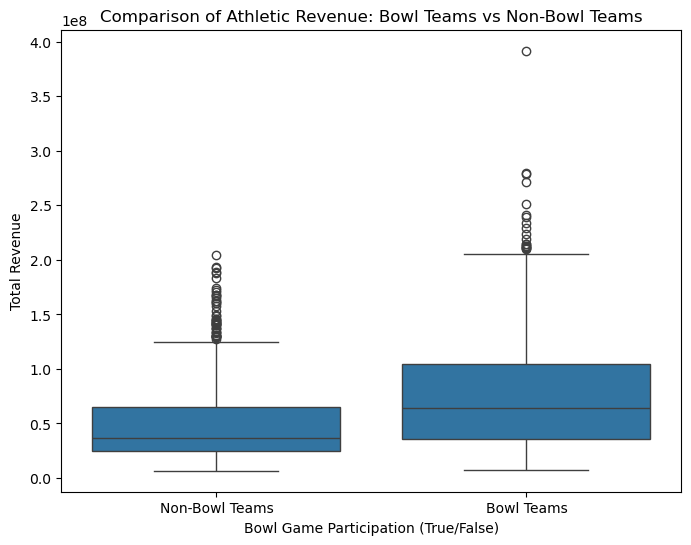

In [13]:
# Summary Statistics Table: Revenue and Attendance by Conference
conference_summary = df_filtered.groupby('conference')[['total_revenue', 'average_attendance']].mean().sort_values(by='total_revenue', ascending=False)

# Formatting the table with commas for thousands and no scientific notation
formatted_table = conference_summary.style.format({
    'total_revenue': '${:,.2f}',  # Format revenue as currency with two decimals
    'average_attendance': '{:,.0f}'  # Format attendance as integer with commas
}).set_caption("Summary Statistics: Revenue and Attendance by Conference") \
  .set_table_styles([{'selector': 'caption', 'props': [('font-weight', 'bold')]}])

# Display the formatted table
formatted_table

from IPython.display import display

# Load the data (assuming the file is 'project_data.csv')

# Convert 'bowl_game' to boolean if not already
df_filtered['bowl_game'] = df_filtered['bowl_game'].astype(bool)

# Separate the teams into two groups: those that participated in a bowl game and those that did not
bowl_teams = df_filtered[df_filtered['bowl_game'] == True]
non_bowl_teams = df_filtered[df_filtered['bowl_game'] == False]

# Perform t-test to check if the revenue difference is significant
t_stat, p_value = stats.ttest_ind(bowl_teams['total_revenue'], non_bowl_teams['total_revenue'], nan_policy='omit')

# Pretty-print t-test results
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("\nThere is a significant difference in athletic revenue between teams that participate in bowl games and those that do not.")
else:
    print("\nThere is no significant difference in athletic revenue between teams that participate in bowl games and those that do not.")

# Summary statistics for both groups with formatted numbers
bowl_revenue_stats = bowl_teams['total_revenue'].describe().apply(lambda x: f"{x:,.2f}")
non_bowl_revenue_stats = non_bowl_teams['total_revenue'].describe().apply(lambda x: f"{x:,.2f}")

# print summary statistics in a table format using display
print("\nBowl Teams Revenue Statistics:")
bowl_stats_df = pd.DataFrame(bowl_revenue_stats).T
bowl_stats_df.index = ['Bowl Teams']

# increase the spacing between columns and center the column names
bowl_stats_df_styled = bowl_stats_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center')]},  # Center and add padding for column headers
     {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'center')]},  # Center and add padding for table data
     {'selector': 'table', 'props': [('border-spacing', '10px')]}]  # Spacing between columns
)

display(bowl_stats_df_styled)

print("\nNon-Bowl Teams Revenue Statistics:")
non_bowl_stats_df = pd.DataFrame(non_bowl_revenue_stats).T
non_bowl_stats_df.index = ['Non-Bowl Teams']

# increase the spacing between columns and center the column names
non_bowl_stats_df_styled = non_bowl_stats_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center')]},  # Center and add padding for column headers
     {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'center')]},  # Center and add padding for table data
     {'selector': 'table', 'props': [('border-spacing', '10px')]}]  # Spacing between columns
)

display(non_bowl_stats_df_styled)

# Visualization: Boxplot of revenues for teams that played in bowl games vs those that did not
plt.figure(figsize=(8, 6))
sns.boxplot(x='bowl_game', y='total_revenue', data=df_filtered)
plt.title('Comparison of Athletic Revenue: Bowl Teams vs Non-Bowl Teams')
plt.xlabel('Bowl Game Participation (True/False)')
plt.ylabel('Total Revenue')
plt.xticks([0, 1], ['Non-Bowl Teams', 'Bowl Teams'])
plt.show()